## FASTQ format

The file is organized in 4 lines per read:
 1 - The header of the DNA sequence with the read id (the read length is optional)
 2 - The DNA sequence
 3 - The header of the sequence quality (this line could be either a repetition of line 1 or empty)
 4 - The sequence quality (it is not human readble, but is provided as PHRED score. Check   https://en.wikipedia.org/wiki/Phred_quality_score for more details)

In [9]:
! dsrc d -s FASTQs/Hi-C_HindIII_T0.fastq.dsrc | head -n 16000 | tail -n 16

@SRR1054341.3997 3997 length=108
CCCATAATATTACCAGTGTTTATCACACAGAAAAAGCAAGATTATATAGCTGATAGACTTTACAGAGACAGTGTCTCCAAACTCCTCCATCAAAAGAAAGGTTATCCT
+SRR1054341.3997 3997 length=108
GGGGGGGGGGGGGGGGGGGGGGGGGGGGGFGGGGGGEGEGEGGBGFGED-CC?DEGGGGGGEGGGDEGGFGFGGGGGFEFGGGGFGGGCGGEEFGFF@GGFEGDGEGE
@SRR1054341.3998 3998 length=108
AATGCTGAAAGAGCTATTATTTTCCCAAAATTACACAGCCAAAGAAACAATCTGCAAACAAAAGACATCTGTATCTTTTGATATGTGCTCTCTGTTAAGGTAGCTTAA
+SRR1054341.3998 3998 length=108
GGGGGEGGGGBFGAFGFGGFGFGGGGGGGGGGGGGCDD=B==??=EEGGGEFDGGGGGGGGFFGGGGEGGGEGGD5CDBGGGGGFEGFGDDGGGEFGDGDEGGFFGFF
@SRR1054341.3999 3999 length=108
TTTTCACTATCAGTTTTGTCCCACAAAATTAATAGAATCAACAGTTCAATCTAGAGCTATGTAGGACAGCAGGGCCCTGGGTCTGGCCCATGAAACCATTCTTTCCTC
+SRR1054341.3999 3999 length=108
FGGGFGGGGGDGGGFGGGDGEFDFFGGGGF:-AAAGBGGFGFFGEGGG?GBEADDGGGGFDGGGGGGGGEGFGGGGGEGFFGGDEGDFFGGG:GGFBGCFFAEFEAED
@SRR1054341.4000 4000 length=108
TAGAGACTTTAATAATAACACTGTAAAAATGAACTGCAACTTTTCCCTAGGATCATGCCTGACTTTACCGCCTCCCAGGCACCACATGCAAAGAAAAGGAATGGATGA
+SRR10

Count the number of lines in the file (4 times the number of reads)

In [21]:
! dsrc d -s FASTQs/Hi-C_HindIII_T0.fastq.dsrc | wc -l

40000000


There are 40 M lines in the file, which means 10 M reads in total.

## Quality check before mapping

In [13]:
from pytadbit.utils.fastq_utils import quality_plot

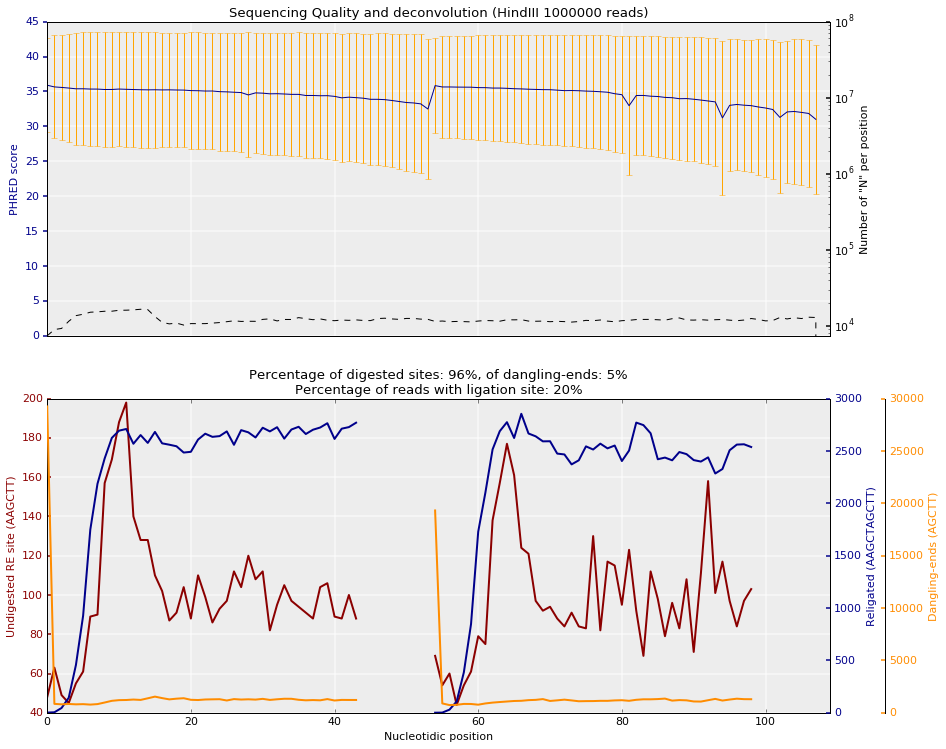

(4.8575, 19.9534)

In [17]:
quality_plot('FASTQs/Hi-C_HindIII_T0.fastq.dsrc', r_enz='HindIII', 
             nreads=1000000, paired=True)

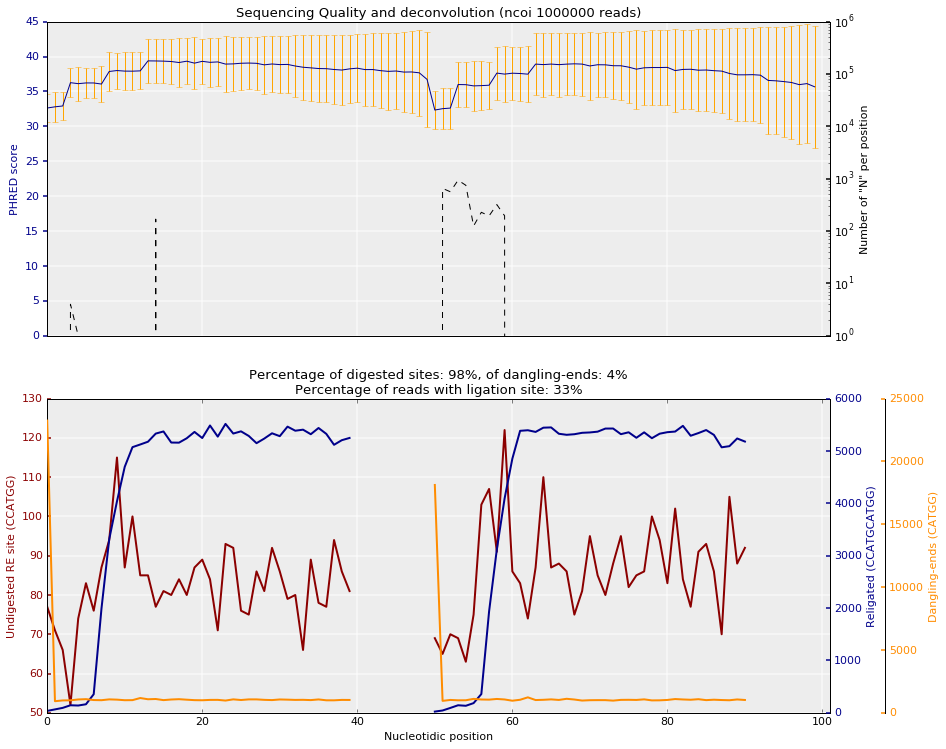

(4.1382, 32.6729)

In [19]:
quality_plot('FASTQs/Hi-C_NcoI_T0.fastq.dsrc', r_enz='ncoi', 
             nreads=1000000, paired=True)

These plots provide a quick overview on the quality of the genome sequencing, as well as a rough estimate of the __efficiency of the digestion and ligation__ steps of the Hi-C experiment.